In [36]:
import torch

import kornia
from e2cnn import gspaces
from e2cnn import nn
from matplotlib import pyplot as plt

In [47]:
def plot_batchs(batch1, batch2,title=" mapa de ativacao"):   
    fig, axes = plt.subplots(2, batch1.shape[1], figsize=(10, 4))
    fig.tight_layout()
    
    for i, ax in enumerate(axes[0]):
        image1 = batch1[0,i].numpy()
        ax.imshow(image1)
        ax.axis('off')

    for i, ax in enumerate(axes[1]):
        image2 = batch2[0,i].numpy()
        ax.imshow(image2)
        ax.axis('off')
        
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)  # Ajusta o espaçamento vertical entre o título e as imagens
    plt.show()
    
#plot pair image with tensor
def plot_pair_image(data1, data2, title1, title2):
    # vmin,vmax=0,1
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(data1.cpu().detach())
    ax[0].set_title(title1)
    ax[1].imshow(data2.cpu().detach())
    ax[1].set_title(title2)
    plt.show()
    
def random_transform(x,angle):
    x = kornia.geometry.transform.rotate(x, angle,mode='nearest',align_corners  = True)
    return x

In [38]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
S = 41
GROUPS = 40
OUT_SHAPE = (1,1)

In [58]:
r2_act = gspaces.Rot2dOnR2(N=GROUPS)
feat_type_in = nn.FieldType(r2_act, 1*[r2_act.trivial_repr])
feat_type_hid = nn.FieldType(r2_act, 8*[r2_act.regular_repr])
feat_type_out = nn.FieldType(r2_act, 6*[r2_act.regular_repr])


model_features = nn.SequentialModule(
    nn.MaskModule(feat_type_in,S),
    nn.R2Conv(feat_type_in, feat_type_hid, kernel_size=3),
    nn.InnerBatchNorm(feat_type_hid),
    nn.ReLU(feat_type_hid),
    nn.PointwiseMaxPool(feat_type_hid, kernel_size=3, stride=1),
    nn.R2Conv(feat_type_hid, feat_type_hid, kernel_size=5),
    nn.InnerBatchNorm(feat_type_hid),
    nn.ReLU(feat_type_hid),
    nn.PointwiseMaxPool(feat_type_hid, kernel_size=3, stride=1),
    nn.R2Conv(feat_type_hid, feat_type_out, kernel_size=7),
    nn.InnerBatchNorm(feat_type_out),
    nn.ReLU(feat_type_out),
    nn.PointwiseAdaptiveAvgPool(feat_type_out,OUT_SHAPE),#subtituir por outro adpativo PointwiseAdaptiveMaxPool
    nn.GroupPooling(feat_type_out)
).eval()

tensor(-0.) tensor(0.)


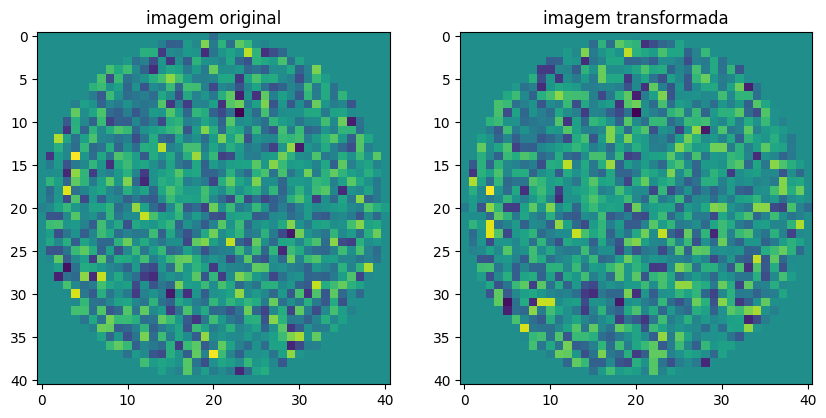

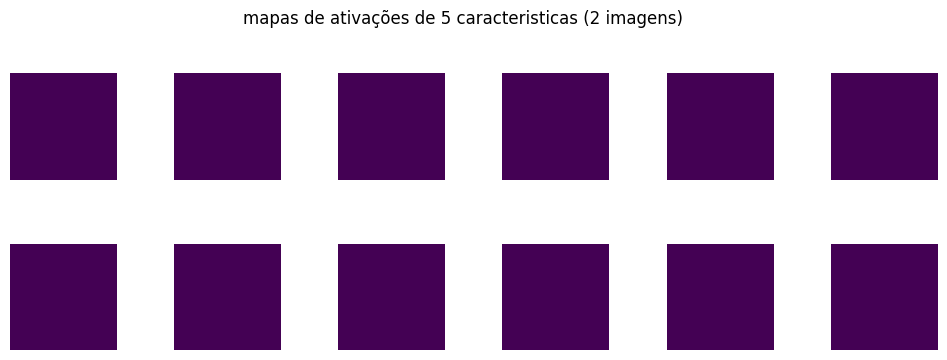

torch.Size([1, 6, 1, 1]) torch.Size([1, 6, 1, 1])
tensor([[[[0.2367]],

         [[2.2650]],

         [[0.0101]],

         [[1.3734]],

         [[0.0905]],

         [[0.0858]]]], grad_fn=<CopySlices>) tensor([[[[0.2504]],

         [[2.2750]],

         [[0.0063]],

         [[1.3288]],

         [[0.0951]],

         [[0.0684]]]], grad_fn=<CopySlices>)


In [63]:
from utils import create_circular_mask
mask = create_circular_mask(S,S)
input = torch.randn(1, 1, S, S)*mask
input_trans = random_transform(input.clone(),torch.tensor([15.]))*mask
# input_trans = torch.randn(1, 1, S, S)*mask
print(input[0,0,0,0],input_trans[0,0,0,0])
plot_pair_image(input[0,0], input_trans[0,0],title1="imagem original",title2="imagem transformada")
input = nn.GeometricTensor(input, feat_type_in)
input_trans = nn.GeometricTensor(input_trans, feat_type_in)


out= model_features(input).tensor
out_trans= model_features(input_trans).tensor
plot_batchs(out.detach().cpu(), out_trans.detach().cpu(),title="mapas de ativações de 5 caracteristicas (2 imagens)")
print(out.shape,out_trans.shape)
print(out,out_trans)

In [41]:
r2_act = gspaces.Rot2dOnR2(N=GROUPS)
feat_type_in = nn.FieldType(r2_act, 1*[r2_act.trivial_repr])
feat_type_hid = nn.FieldType(r2_act, 8*[r2_act.regular_repr])
feat_type_out = nn.FieldType(r2_act, 1*[r2_act.regular_repr])

model_orientation = nn.SequentialModule(
    nn.MaskModule(feat_type_in,S),
    nn.R2Conv(feat_type_in, feat_type_hid, kernel_size=3),
    nn.InnerBatchNorm(feat_type_hid),
    nn.ReLU(feat_type_hid),
    nn.R2Conv(feat_type_hid, feat_type_hid, kernel_size=5),
    nn.InnerBatchNorm(feat_type_hid),
    nn.ReLU(feat_type_hid),
    nn.PointwiseAvgPool(feat_type_hid, kernel_size=3, stride=1),
    nn.R2Conv(feat_type_hid, feat_type_out, kernel_size=7),
    nn.InnerBatchNorm(feat_type_out),
    nn.ReLU(feat_type_out),
    nn.PointwiseAdaptiveAvgPool(feat_type_out,OUT_SHAPE),#subtituir por outro adpativo PointwiseAdaptiveMaxPool
).eval()

C:\Users\renga\AppData\Local\Temp\ipykernel_2848\623169859.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


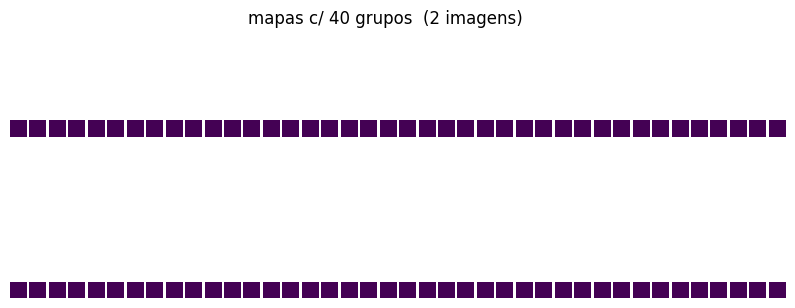

torch.Size([1, 40, 1, 1]) torch.Size([1, 40, 1, 1])
tensor([[[[0.0484]],

         [[0.0458]],

         [[0.0417]],

         [[0.0361]],

         [[0.0323]],

         [[0.0317]],

         [[0.0319]],

         [[0.0320]],

         [[0.0347]],

         [[0.0369]],

         [[0.0382]],

         [[0.0383]],

         [[0.0352]],

         [[0.0344]],

         [[0.0367]],

         [[0.0433]],

         [[0.0505]],

         [[0.0545]],

         [[0.0573]],

         [[0.0572]],

         [[0.0539]],

         [[0.0513]],

         [[0.0453]],

         [[0.0391]],

         [[0.0351]],

         [[0.0330]],

         [[0.0344]],

         [[0.0359]],

         [[0.0364]],

         [[0.0363]],

         [[0.0382]],

         [[0.0394]],

         [[0.0376]],

         [[0.0345]],

         [[0.0325]],

         [[0.0340]],

         [[0.0391]],

         [[0.0462]],

         [[0.0497]],

         [[0.0501]]]], grad_fn=<MeanBackward1>) tensor([[[[0.0591]],

         [[0.0602]],

In [42]:
out= model_orientation(input).tensor
out_trans= model_orientation(input_trans).tensor
plot_batchs(out.detach().cpu(), out_trans.detach().cpu(),title="mapas c/ {} grupos  (2 imagens)".format(GROUPS))
print(out.shape,out_trans.shape)
print(out,out_trans)